# Code Challenge XIBIX

## Try to read data from Json

In [55]:
# https://www.geeksforgeeks.org/read-json-file-using-python/
# read JSON data into objects

import json
 
# Opening JSON file
f = open('mesh.json')
#f = open('mesh_x_sin_cos_10000.json')

# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
nodes = data['nodes']
#for i in data['nodes']:
#    print(i)

elements = data['elements']
#for i in data['elements']:
#    print(i)

values = data['values']
#for i in data['values']:
#    print(i)    

# Closing file
f.close()

## Function to read data from Json

In [6]:
def read_json_mesh_file(json_file):
    """reads json file and returns dictionaries of nodes, elements and values
    
    Args:
        json_file: file containing json data
        
    Returns:
        nodes: dictionary
        elements: dictionary
        values: dictionary
    """
    import json
    # get file handle
    f = open(json_file)
    # load data
    data = json.load(f)
    
    # get dicts from data
    nodes = data['nodes']
    elements = data['elements']
    values = data['values']
    
    # close filehandle
    f.close()
    
    return (nodes,elements,values)

## Read data

In [111]:
#(nodes,elements,values) = read_json_mesh_file('mesh.json')
(nodes,elements,values) = read_json_mesh_file('mesh_x_sin_cos_10000.json')

# nodes:
# {"id": 0,"x": 0.0, "y": 0.0}
# {"id": 1,"x": 0.0, "y": 1.0}
# {"id": 12,"x": 1.0,"y": 1.0}

# elements:"id": 0, "nodes": [0,1,12]

# "values": [{ "element_id": 0, "value": 0.15154957113761364 }

## Test: Draw triangle outlines

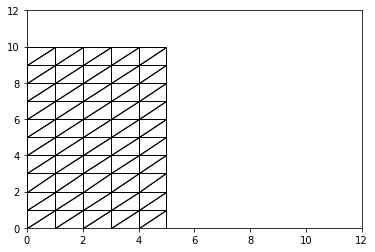

In [75]:
for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
        
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, fill=None)
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

plt.show()

## Test: Draw triangles with color map based on element value
local maxima are blue

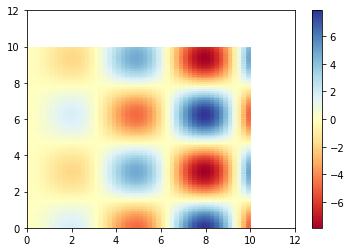

In [112]:
fig= plt.figure()
ax= fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()

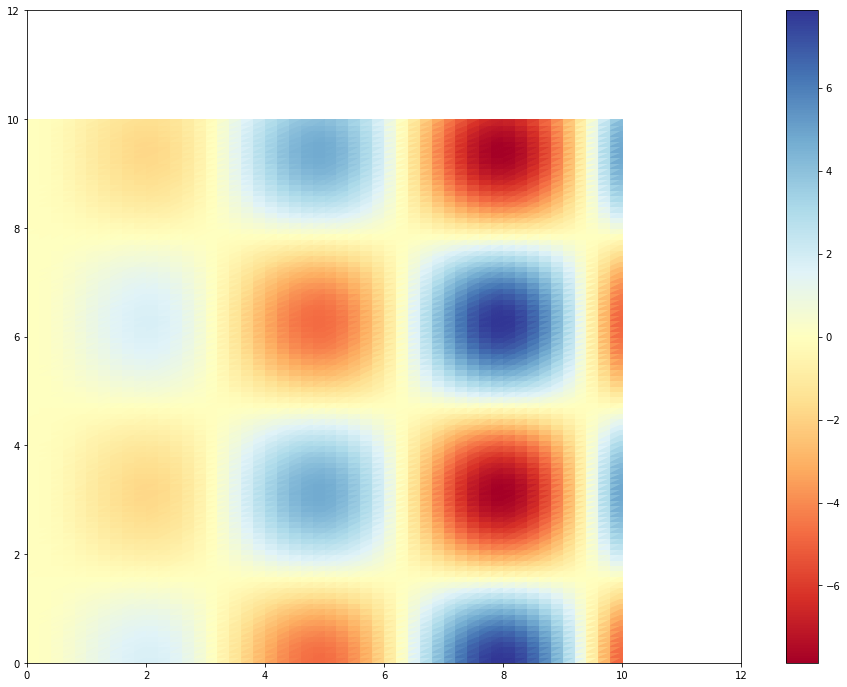

In [113]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap=plt.cm.RdYlBu
norm = plt.Normalize(min([d['value'] for d in values]), max([d['value'] for d in values]))

for element in elements:
    coordinates = []
    for a in element['nodes']:
        coordinates.append([nodes[a]['x'], nodes[a]['y']])
    
    #print value
    v = values[element['id']]
    color=cmap(norm(v['value']))
    
    #print(coordinates)
    pts = np.array(coordinates)
    p = Polygon(pts, closed=True, color = color) # fill=None
    ax = plt.gca()
    ax.add_patch(p)
    ax.set_xlim(0,12)
    ax.set_ylim(0,12)

#colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array(colvals)
fig.colorbar(sm, ax=ax)

plt.show()